In [1]:
%matplotlib inline

import pandas as pd
import math

dfs_pbhra = pd.concat(pd.read_csv(f"results/results_pbhra_{i}.csv") for i in range(20))
dfs_aodv = pd.concat(pd.read_csv(f"results/results_aodv_{i}.csv") for i in range(20))

In [2]:
df = [dfs_pbhra[dfs_pbhra.range == tx_range] for tx_range in [50 + (r + 1) * 50 for r in range(5)]]

In [3]:
agg = [d.groupby(['range', 'num_data']) for d in df]
packets = [i.packets.mean().reset_index() for i in agg]
std_packets = [i.packets.std().reset_index(drop=True) for i in agg]

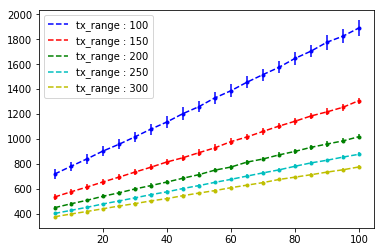

In [4]:
import matplotlib.pyplot as plt
colors = ["b", "r", "g", "c", "y"]

for i in range(5):
    plt.plot(packets[i]['num_data'].tolist(),
             packets[i]['packets'].tolist(),
             linestyle='--',
             color=colors[i],
             label=f"tx_range : {packets[i]['range'].unique()[0]}")
    plt.errorbar(packets[i]['num_data'].tolist(),
                 packets[i]['packets'].tolist(),
                 xerr=0,
                 yerr=2*std_packets[i]/math.sqrt(20),
                 linestyle='',
                 fmt=colors[i]+'.')
plt.legend();

In [5]:
df1 = dfs_pbhra[(dfs_pbhra.range == 100) & (dfs_pbhra.num_data < 25)].drop(columns='seed')
df2 = dfs_aodv[(dfs_aodv.range == 100) & (dfs_aodv.num_data < 25)].drop(columns='seed')

In [6]:
agg1 = df1.groupby(['range', 'num_data'])
agg2 = df2.groupby(['range', 'num_data'])
packets1 = agg1.packets.mean().reset_index()
std_packets1 = agg1.packets.std().reset_index(drop=True)
packets2 = agg2.packets.mean().reset_index()
std_packets2 = agg2.packets.std().reset_index(drop=True)

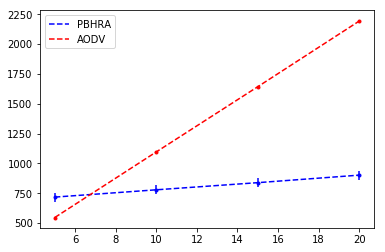

In [7]:
plt.plot(packets1['num_data'].tolist(),
         packets1['packets'].tolist(),
         linestyle='--',
         color=colors[0],
         label=f"PBHRA")
plt.errorbar(packets1['num_data'].tolist(),
             packets1['packets'].tolist(),
             xerr=0,
             yerr=2*std_packets1/math.sqrt(20),
             linestyle='',
             fmt=colors[0]+'.')
plt.plot(packets2['num_data'].tolist(),
         packets2['packets'].tolist(),
         linestyle='--',
         color=colors[1],
         label=f"AODV")
plt.errorbar(packets2['num_data'].tolist(),
             packets2['packets'].tolist(),
             xerr=0,
             yerr=2*std_packets2/math.sqrt(20),
             linestyle='',
             fmt=colors[1]+'.')
plt.legend();